In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
def excVWN(n):
  # Constants
    X1 = 0.75*(3.0/(2.0*pi))**(2.0/3.0);
    A  =  0.0310907;
    x0 = -0.10498;
    b  = 3.72744;
    c  = 12.9352;
    Q  = sqrt(4*c-b*b);
    X0 = x0*x0+b*x0+c;

    rs=(4*pi/3*n)**(-1/3); # Added internal conversion to rs
  
    x=sqrt(rs); 
    X=x*x+b*x+c;

    out=-X1/rs+ A*(log(x*x/X)+2*b/Q*np.arctan(Q/(2*x+b))-(b*x0)/X0*(log((x-x0)*(x-x0)/X)+2*(2*x0+b)/Q*np.arctan(Q/(2*x+b)) ) );
    return out


def excVWNp(n):
  # Constants
    Mp = 1800 #1836.152
    X1 = 0.75*(3.0/(2.0*pi))**(2.0/3.0);
    A  =  0.0310907;
    x0 = -0.10498;
    b  = 3.72744;
    c  = 12.9352;
    Q  = sqrt(4*c-b*b);
    X0 = x0*x0+b*x0+c;
 
    rs=1/((4*pi/3*(n / Mp**3 ))**(1/3)); # Added internal conversion to rs
  
    x=sqrt(rs); 
    X=x*x+b*x+c;

    out=-X1/rs+ A*(log(x*x/X)+2*b/Q*np.arctan(Q/(2*x+b))-(b*x0)/X0*(log((x-x0)*(x-x0)/X)+2*(2*x0+b)/Q*np.arctan(Q/(2*x+b)) ) );
    return Mp * out

In [3]:
#crear densidad gaussiana 3d protones y electrones 



S=[300, 300, 300];


a=5.66/0.52917721; # Lattice constant (converted from angstroms to bohrs)

R=a*np.diag(np.ones(3)); # Cubic lattice

# Code fragment to create columns of m1, m2, m3 indices
ms=np.arange(0,np.prod(S)).T; # Count from zero to S1*S2*s3-1 in a column vector
m1=ms%S[0];
m2=floor(ms/S[0])%S[1];
m3=floor(ms/(S[0]*S[1]))%S[2];



# Wrap indices to +/- Fourier convention
n1=m1-(m1>S[0]/2)*S[0];
n2=m2-(m2>S[1]/2)*S[1];
n3=m3-(m3>S[2]/2)*S[2];

# Gather indices into columns of a matrices
N=[n1, n2, n3];
M=[m1, m2, m3];


## Compute Cartesian coords of grid points
r=np.dot((R.T),np.dot(inv(diag(S)),M)); # Scale by 1/S(), mult by real-space vectors (L's)

# Compute reciprocal-space vectors and lengths
G=2*pi*np.dot(inv(R.T),N);
G2=sum( G**2, axis=1);

dr=r-np.dot(np.mat(diag(R)).T,np.ones([prod(S),1]).T)/2;
dr=np.sqrt(np.sum(np.array(dr)**2,0))

#print(shape(dr),shape(M))

sig=1
Sig=1/4
psi1=(1/(2*pi*sig**2)**(3/4))*exp(-dr**2/(4*sig**2))
psi2=(1/(2*pi*Sig**2)**(3/4))*exp(-dr**2/(4*Sig**2))

0.9999997322602728 normalization electron gaussian
0.9999999999999998 normalization proton gaussian


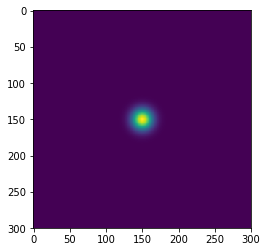

In [4]:
#probar densidad gaussiana
plt.imshow(reshape(psi2,S)[30,:,:])
print(np.sum(psi1*np.conj(psi1))*np.linalg.det(R)/np.prod(S),"normalization electron gaussian")
print(np.sum(psi2*np.conj(psi2))*np.linalg.det(R)/np.prod(S),"normalization proton gaussian")

In [5]:
# crear transformada de fourier inversa 3d en array compacto (necesita inicializar lattice )
Psit1=np.fft.fftn(reshape(psi1,S), axes=(0, 1, 2))
np.sum(psi1*np.conj(psi1))*np.linalg.det(R)/np.prod(S)
# Operador de overlap
O=np.linalg.det(R)
ndens=psi1*psi1
Ndens=psi2*psi2
#poner todo junto
E_ex_e=real( np.trapz((excVWN(ndens))*ndens )*np.linalg.det(R)/np.prod(S));
E_ex_p=real( np.trapz((excVWNp(Ndens))*Ndens )*np.linalg.det(R)/np.prod(S));
print(E_ex_e, E_ex_p)

-0.2316501949474182 -1.4039352424449631


In [6]:
#checking that my implementation of Exc works
print(excVWN(1)) #should be -0.81015
print(excVWN(.1)) #should be -0.39621


print(excVWNp(1)) #should be -1.3573 (for Mp=1800)
print(excVWNp(.1)) #should be -0.63721 (for Mp=1800)

-0.810151378688813
-0.39620590148651225
-1.3573257648989483
-0.6372060569165849


In [7]:
a

10.695849883633501

-0.22945914990681968 nan agreement to 1E-9
0.9682158986536409


/Users/juanmendezvalderrama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/juanmendezvalderrama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/Users/juanmendezvalderrama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


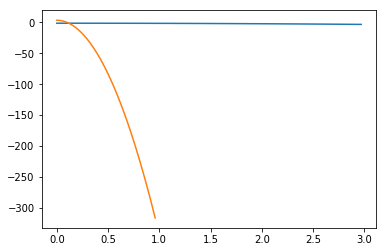

In [8]:
##from mpmath import *
#mp.dps = 15; mp.pretty = True

a,b,c=[2.35,2.4,3.2]   #for epc17-1
#a,b,c=[2.35,2.4,6.6]   #for epc17-2
sig=1
Sig=1/40

N=100;
#U=10.695849883633501 /2
U=3
rr=np.arange(0,U,U/N)
ndens2=((1/(2*pi*sig**2)**(3/4))*exp(-rr**2/(4*sig**2)))**2
Ndens2=((1/(2*pi*Sig**2)**(3/4))*exp(-rr**2/(4*Sig**2)))**2
difr=U/N

plot(rr,log10(ndens2))
plot(rr,log10(Ndens2))
#plot(rr[1:],(1/(2*pi*sig**2)**(3/2))*rr[1:]/rr[1:])


Exc_e= difr*np.trapz((excVWN(ndens2))*ndens2*rr*rr*4*np.pi)
Exc_p= difr*np.trapz((excVWNp(Ndens2))*Ndens2*rr*rr*4*np.pi)
print(Exc_e,Exc_p, "agreement to 1E-9")
Norm1= difr*np.trapz(ndens2*rr*rr*4*np.pi)
Norm2= difr*np.trapz(Ndens2*rr*rr*4*np.pi)
print(Norm1)

In [40]:
def EPC_17(a,b,c,sig,Sig):
    
    lamb=(1/(2*np.pi*(Sig)*(sig)))**3
    alphe=1/(1/Sig**2+1/sig**2)
    
    N=100000;
    U=10000
    u=np.arange(0,U,U/N)

    
    
    out= -4*pi*(U/N)*np.trapz((u**2)*lamb*np.exp(-u**2 /(2*alphe) )/ (a-b*np.sqrt(lamb)*np.exp(-u**2 /(4*alphe) )+c*lamb*np.exp(-u**2 /(2*alphe) )))
    return out

def Energy(a,b,c,sig,Sig):
    M=1836.152
    Te=(3/8)*(1/sig**2)
    Tp=(3/8)*(1/Sig**2) /M
    Vcoul=np.sqrt(2/np.pi)/np.sqrt(sig**2 +Sig**2)
    #abc=np.sqrt(4*a*c-b**2)
    #EPC17pre= (-4*(np.pi**(3/2))*(sig**3)*(Sig**3))/(c*abc*((sig**2+Sig**2)**(3/2)))  
    #EPC17_1=(-1j*b+abc)*polylog( 3/2,   (b-1j*abc)/(4*np.sqrt(2)*a* ((np.pi*sig*Sig)**(3/2))  ) )
    #EPC17_2=(1j*b+abc)*polylog(  3/2,  (b+1j*abc)/(4*np.sqrt(2)*a* ((np.pi*sig*Sig)**(3/2))  ) )
    #SHO=0.5*(0.2*10)*Sig**2
    #EPC17=EPC17pre*(EPC17_1+EPC17_2)
    EPC17=EPC_17(a,b,c,sig,Sig)
    Vautointele=np.sqrt(1/np.pi)/sig
    Vautointprot=np.sqrt(1/np.pi)/Sig
    
    N=100000;
    U=10.695849883633501 /2
    #U=5

    rr=np.arange(0,U,U/N)
    ndens2=((1/(2*pi*sig**2)**(3/4))*exp(-rr**2/(4*sig**2)))**2
    Ndens2=((1/(2*pi*Sig**2)**(3/4))*exp(-rr**2/(4*Sig**2)))**2
    difr=U/N
    ndens2[np.where(ndens2<1E-17)]=1E-17
    Ndens2[np.where(Ndens2<1E-17)]=1E-17

    Exc_e= difr*np.trapz((excVWN(ndens2))*ndens2*rr*rr*4*np.pi)
    Exc_p= difr*np.trapz((excVWNp(Ndens2))*Ndens2*rr*rr*4*np.pi)
    
    print(0.5*1800*((2.008185134498076e-02)**2)*3*Sig**2)
    return Te+Tp -Vcoul+0*0.5*1800*((2.008185134498076e-02)**2)*3*Sig**2 + real(EPC17)#+Exc_e+Exc_p+0.5*Vautointele+0.5*Vautointprot #+real(EPC17)
    #return Exc_p

In [41]:

def gradEnergy(a,b,c,sig,Sig,h):
    Grad1=(Energy(a,b,c,sig+h,Sig)-Energy(a,b,c,sig-h,Sig))/(2*h)
    Grad2=(Energy(a,b,c,sig,Sig+h)-Energy(a,b,c,sig,Sig-h))/(2*h)
    return np.array([real(Grad1),real(Grad2)])

'''

def gradEnergy(a,b,c,sig,Sig,h):
    Grad1=(-Energy(a,b,c,sig+2*h,Sig)+8*Energy(a,b,c,sig+h,Sig)-8*Energy(a,b,c,sig-h,Sig)+Energy(a,b,c,sig-2*h,Sig))/(12*h)
    Grad2=(-Energy(a,b,c,sig,Sig+2*h)+8*Energy(a,b,c,sig,Sig+h)-8*Energy(a,b,c,sig,Sig-h)+Energy(a,b,c,sig,Sig-2*h))/(12*h)
    return np.array([Grad1,Grad2])
'''

'\n\ndef gradEnergy(a,b,c,sig,Sig,h):\n    Grad1=(-Energy(a,b,c,sig+2*h,Sig)+8*Energy(a,b,c,sig+h,Sig)-8*Energy(a,b,c,sig-h,Sig)+Energy(a,b,c,sig-2*h,Sig))/(12*h)\n    Grad2=(-Energy(a,b,c,sig,Sig+2*h)+8*Energy(a,b,c,sig,Sig+h)-8*Energy(a,b,c,sig,Sig-h)+Energy(a,b,c,sig,Sig-2*h))/(12*h)\n    return np.array([Grad1,Grad2])\n'

In [43]:
sig=1
Sig=1/6
Energy(a,b,c,sig,Sig) #for Sig=1/2 and sig=1 should be -0.43294 For Sig=1/4 sig=1 should be -0.62090, -0.74004
#3.024607452304744e-02

0.030246056508142917


-0.4337921055242128

For $\sigma$=1 and $\Sigma$=1/6  



For python radial integration

T=0.3823523324866351
EHart= 1.187635059721722
EPC=-0.029115955315422756
Exce= -0.23165018668984175
Excp=-2.088209566937999
Tot=-0.7789883167349063

For octave

S=[120,120,120]


T=0.38250
EHart=1.1876
EPC=-0.029118
Exce=-0.23165
Excp=-2.0882
Tot=-0.77886

S=[80,80,80]

For octave
T=0.38242
EHart= 1.1543
EPC=-0.029479
Exce=-0.23165
Excp=-2.0524
Tot=-0.77674

In [60]:

a,b,c=[2.35,2.4,3.2]   #for epc17-1
#a,b,c=[2.35,2.4,6.6]   #for epc17-2
presSig=np.array([1,1/6])

E0= Energy(a,b,c,presSig[0],presSig[1])
print(presSig,E0)

h=1E-5
grad1=gradEnergy(a,b,c,presSig[0],presSig[1],h)

step=0.1
postsSig=presSig-step*grad1


E1= Energy(a,b,c, real(postsSig[0]), real(postsSig[1]))
delta=abs(E1-E0)
E0=real(E1)

print(postsSig,E1,delta, grad1)


[1.         0.16666667] -0.40467615020879005
[0.99842426 0.16272684] -0.4048393280664039 0.00016317785761382764 [0.01575744 0.03939825]


In [61]:

gamma = 1E-1 # Step size multiplier
precision = 1E-6  # Desired precision of result
max_iters = 1000  # Maximum number of iterations

# Derivative function

j=0
for i in range(max_iters):
    presSig = postsSig
    postsSig = presSig - gamma * gradEnergy(a,b,c,presSig[0],presSig[1],h)
    step = np.sqrt(np.sum((postsSig - presSig)**2))
    j=j+1
    print(step,Energy(a,b,c, real(postsSig[0]), real(postsSig[1])),real(postsSig[0]), real(postsSig[1]))
    if abs(step) <= precision:
        break
    
print("Minimum at", postsSig, "With energy",Energy(a, b, c, real(postsSig[0]), real(postsSig[1]))," within" , j, "iterations")
    

0.0034548965157636924 -0.4049477280249553 0.9968259579033458 0.15966387677842256
0.002831578574100728 -0.4050209907418265 0.9952411438719491 0.1573173470626094
0.0023562606497203415 -0.4050721940476693 0.9936962813110175 0.15553820009924393
0.0020023222460750665 -0.40510955992772424 0.992209851129854 0.15419662651063484
0.00173994355201102 -0.40513804966477973 0.990793906716191 0.1531854366265867
0.0015419146865231815 -0.40516059530683224 0.9894555124843598 0.1524197984739867
0.001386953049907011 -0.40517893477438416 0.9881979925861475 0.15183474935788924
0.0012602569850257385 -0.40519412821962847 0.9870219600539567 0.15138176464342848
0.001152364108600158 -0.40520685693149394 0.9859261299262059 0.151025254657729
0.001057541341792264 -0.405217588711113 0.9849079402861052 0.15073945132256408
0.0009724013318678758 -0.4052266669142914 0.9839640137647145 0.15050585536276642
0.0008949362540507177 -0.40523435796003565 0.983090492693405 0.1503112484852093
0.0008239161252731557 -0.405240876974

In [62]:
#Minimum at [0.99141028 0.16841099] With energy -0.43455947661247274  within 1000 iterations
#Minimum at [0.89742813 0.17266401] With energy -0.4389345347508731  within 77 iterations

In [103]:
%pylab inline
a=2.35; b=2.4; c=3.2;
sig=1
Sig=1/2 *1E-5
pre=1/(2*pi*sig*Sig)**3
al=0.5*(1/sig**2+1/Sig**2)

N=10000
U=1000
u=np.arange(0,U,U/N)


out=-4*np.pi*pre*al**(-1.5)*sum( (u**2 *exp(-u**2))/(a-b*sqrt(pre*exp(-u**2))+c*pre*exp(-u**2)) )*U/N;
print(out,Energy(a,b,c,sig,Sig))

Populating the interactive namespace from numpy and matplotlib


NameError: name 'Energy' is not defined

Populating the interactive namespace from numpy and matplotlib


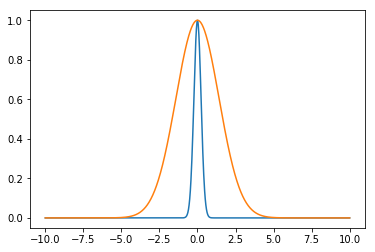

In [16]:
%pylab inline
cx=np.linspace(-10,10,1000)
plot(cx,np.exp(-0.5*cx**2 /(2*(1/6)**2) ))
plot(cx,np.exp(-0.5*cx**2 /(2*(1)**2) ))

In [8]:
#do not erase, converged calculation for the epc functional 

print("Minimum at", postsSig, "With energy",Energy(a, b, c, real(postsSig[0]), real(postsSig[1]))," within" , j, "iterations")
    

Minimum at [0.960089147599263 0.185027812603674] With energy -0.427957172507869  within 10000 iterations


In [ ]:
 ssig=sum(nele.*dr.*dr)*det(gbl_R)/prod(gbl_S)
ssig =  6.043304402648485
octave:38> sSig=sum(Npro.*dr.*dr)*det(gbl_R)/prod(gbl_S)
sSig =    6.303874680199510e-01


sSig=sum(Npro.*dr.*dr)*det(gbl_R)/prod(gbl_S)
sSig =  1.261719557959719
octave:49> sSig=sum(nele.*dr.*dr)*det(gbl_R)/prod(gbl_S)
sSig =  6.116323678266423